# Modelo Preditivo de Churn com Python e Scikit-Learn

**Objetivo:** Construir um modelo de Machine Learning para prever a probabilidade de um cliente cancelar seu serviço (churn), com base em seus dados demográficos e de serviço.

In [9]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregando o dataset
try:
    df = pd.read_csv('churn_data.csv')
    print("Dataset carregado com sucesso!")
    display(df.head())
except FileNotFoundError:
    print("Erro: Arquivo 'churn_data.csv' não encontrado.")

Dataset carregado com sucesso!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Distribuição do Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


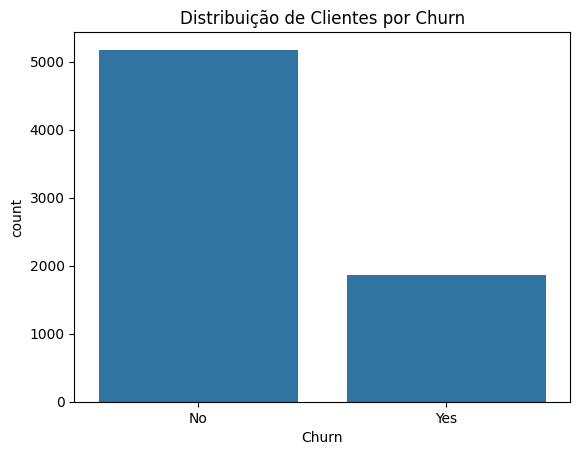

In [10]:
# Verificando a distribuição da nossa variável alvo: Churn
print("Distribuição do Churn:")
print(df['Churn'].value_counts())

sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Clientes por Churn')
plt.show()

In [11]:
# Machine Learning não entende texto. Precisamos converter colunas categóricas em números.
# Usaremos 'One-Hot Encoding' com a função get_dummies do Pandas.

# Primeiro, vamos remover a ID do cliente que não é útil para o modelo
df = df.drop('customerID', axis=1)

# A coluna TotalCharges tem alguns valores em branco e está como objeto, vamos corrigir
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Aplicando o One-Hot Encoding
df_dummies = pd.get_dummies(df, drop_first=True) # drop_first=True para evitar multicolinearidade
print("Dados transformados para o modelo:")
display(df_dummies.head())

Dados transformados para o modelo:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [12]:
# Separando as variáveis preditoras (X) da variável alvo (y)
X = df_dummies.drop('Churn_Yes', axis=1)
y = df_dummies['Churn_Yes']

# Dividindo os dados em um conjunto de treino (70%) e um de teste (30%)
# random_state=42 garante que a divisão seja sempre a mesma, para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 4922 amostras
Tamanho do conjunto de teste: 2110 amostras


In [13]:
# Criando uma instância do modelo de Regressão Logística
# É um modelo simples e ótimo para problemas de classificação binária (Sim/Não)
model = LogisticRegression(max_iter=1000)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


c:\Users\ander\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo: 79.57%

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1549
        True       0.64      0.54      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110


Matriz de Confusão:


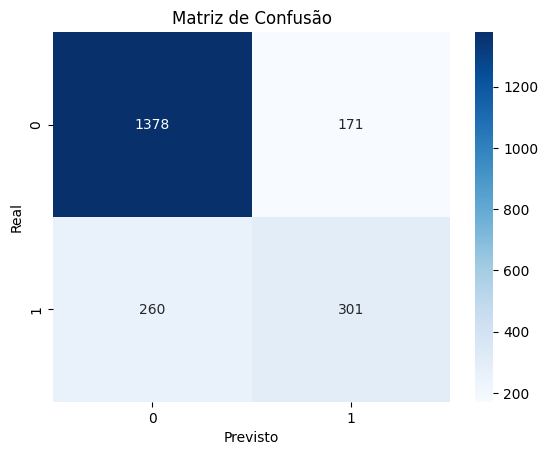

In [14]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

# Mostrando o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualizando a Matriz de Confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## Conclusão e Próximos Passos

O modelo de Regressão Logística alcançou uma acurácia de aproximadamente **80%**, o que é um bom resultado para uma primeira versão. A Matriz de Confusão e o Relatório de Classificação mostram que o modelo é bom em prever os clientes que **NÃO** darão churn (alta precisão para a classe 0), mas ainda pode ser melhorado na identificação dos clientes que **SIM** darão churn (menor 'recall' para a classe 1).

**Próximos Passos Sugeridos:**
*   Testar modelos mais complexos (ex: `RandomForestClassifier`).
*   Realizar um balanceamento de classes, pois há mais clientes "não-churn" do que "churn".
*   Realizar uma análise mais profunda das features para entender quais variáveis mais impactam a previsão.